# Tugas 1

### Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [28]:
# Mengimpor library
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv('../Data/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
# Mengubah data kategorikal menjadi numerik: sex, smoker, dan region
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


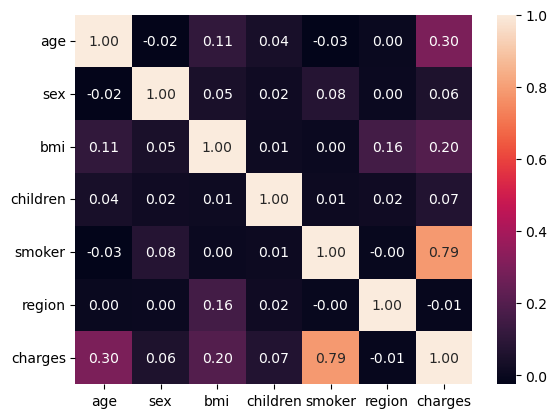

In [32]:
# Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()


In [33]:
# Dari visualisasi heatmap di atas maka dapat dilihat bahwa 3 fitur tertinggi yang berpengaruh terhadap charges
# yakni smoker, age, dan bmi. Maka kita akan menggunakan ketiga fitur tersebut sebagai variabel bebas (X).

X = data[['smoker', 'age', 'bmi']]
y = data['charges']

X.head()

,smoker,age,bmi
0,1,19,27.900
1,0,18,33.770
2,0,28,33.000
3,0,33,22.705
4,0,32,28.880


### Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [34]:
#Membagi menjadi data train dan data test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Lakukan feature scaling jika diperlukan.

In [35]:
#Lakukan feature scaling jika diperlukan.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Buat model multiple linear regression menggunakan Scikit-Learn.
### Latih model pada data latih dan lakukan prediksi pada data uji.


In [36]:
# Buat model multiple linear regression menggunakan Scikit-Learn.
# Latih model pada data latih dan lakukan prediksi pada data uji.

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

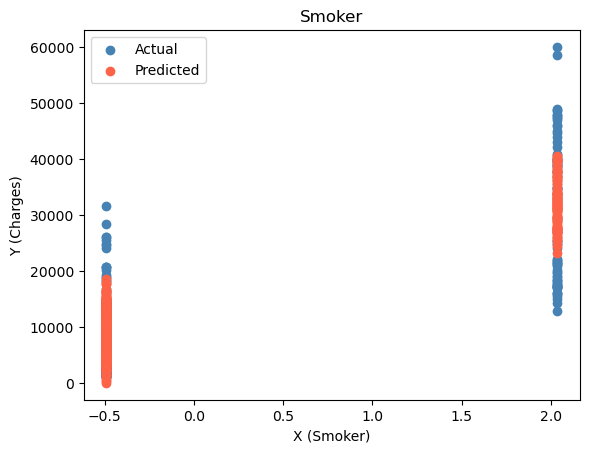

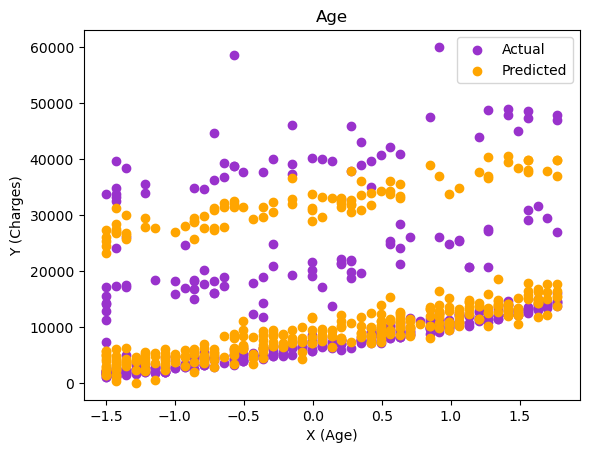

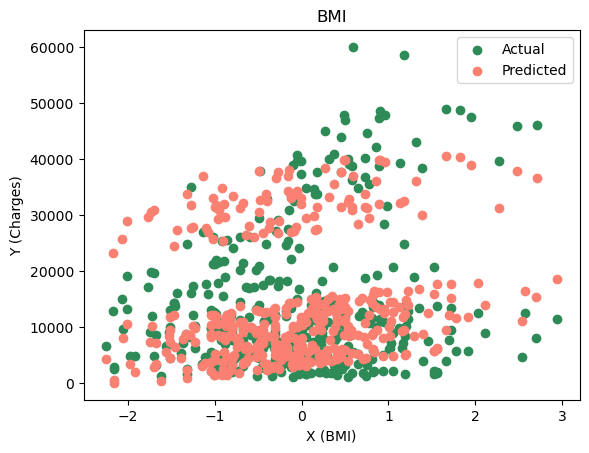

In [37]:
# Daftar prediktor, warna, dan judul
predictors = ['Smoker', 'Age', 'BMI']
colors_actual = ['steelblue', 'darkorchid', 'seagreen']
colors_predicted = ['tomato', 'orange', 'salmon']

# Menghasilkan scatter plot untuk setiap prediktor
for i in range(len(predictors)):
    plt.scatter(X_test[:, i], y_test, color=colors_actual[i], label='Actual')
    plt.scatter(X_test[:, i], y_pred, color=colors_predicted[i], label='Predicted')
    plt.title(predictors[i])
    plt.xlabel(f"X ({predictors[i]})")
    plt.ylabel("Y (Charges)")
    plt.legend()
    plt.show()


#### Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [38]:
# Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R2:', r2)

MAE: 3934.947395925349
MSE: 32266086.037517138
R2: 0.7777782410843159
